# 4.2 Assignment: Clustering Exercise

### Keiuntae Smith
### DSC 630 Predictive Analysis
### 29 June 2022

In [1]:
#Load the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.style as style
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
import warnings
from pylab import rcParams

In [2]:
# Load dataset
df = pd.read_csv('als_data.csv')

# View the dataframe
df.head(5)

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,1,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,...,143.0,0.017422,533,8,7.0,7,0.002646,6.0,6.0,6.0
1,2,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,...,136.0,0.010453,649,8,7.0,5,0.005386,7.0,5.0,5.0
2,3,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,...,140.0,0.008929,1234,5,0.0,0,0.008929,6.0,5.0,5.0
3,4,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,...,138.0,0.012469,2492,5,5.0,3,0.004988,7.0,6.0,5.0
4,5,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,...,138.0,0.008292,2956,6,4.0,1,0.008489,6.0,5.0,5.0


In [3]:
#check the number of columns and rows
df.shape

(2223, 101)

In [4]:
#check the data types
df.dtypes

ID                   int64
Age_mean             int64
Albumin_max        float64
Albumin_median     float64
Albumin_min        float64
                    ...   
trunk_min            int64
trunk_range        float64
Urine.Ph_max       float64
Urine.Ph_median    float64
Urine.Ph_min       float64
Length: 101, dtype: object

In [5]:
df.describe()

,ID,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,...,Sodium_min,Sodium_range,SubjectID,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
count,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,...,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000,2223.000000
mean,1214.874944,54.550157,47.011134,43.952542,40.766347,0.013779,-0.728274,31.692308,27.104926,19.877193,...,136.755061,0.015000,498880.290148,6.203779,4.893387,2.955915,0.007136,6.820450,5.710639,5.183221
std,696.678300,11.396546,3.233980,2.654804,3.193087,0.009567,0.622329,5.314228,6.633643,8.583509,...,2.715247,0.009283,289923.528450,1.747660,2.146076,2.358095,0.004503,0.932141,0.625039,0.437222
min,1.000000,18.000000,37.000000,34.500000,24.000000,0.000000,-4.345238,11.000000,2.500000,0.000000,...,112.000000,0.000000,533.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,5.000000
25%,614.500000,47.000000,45.000000,42.000000,39.000000,0.009042,-1.086310,29.000000,23.000000,14.000000,...,135.000000,0.010582,240825.500000,5.000000,3.000000,1.000000,0.003643,6.000000,5.000000,5.000000
50%,1213.000000,55.000000,47.000000,44.000000,41.000000,0.012111,-0.620748,33.000000,28.000000,20.000000,...,137.000000,0.013123,496835.000000,7.000000,5.000000,3.000000,0.006920,7.000000,6.000000,5.000000
75%,1815.500000,63.000000,49.000000,46.000000,43.000000,0.015873,-0.283832,36.000000,32.000000,27.000000,...,138.000000,0.017278,750300.500000,8.000000,6.500000,5.000000,0.009639,7.000000,6.000000,5.000000
max,2424.000000,81.000000,70.300000,51.100000,49.000000,0.243902,1.207011,40.000000,40.000000,40.000000,...,145.000000,0.142857,999482.000000,8.000000,8.000000,8.000000,0.042017,9.000000,9.000000,8.000000


## Remove any data that is not relevant to the patient’s ALS condition.

In [6]:
#delete columns "ID" and "SubjectID" due to irrelevance
df = df.drop(['ID', 'SubjectID'], axis=1)

In [7]:
#print new dataframe to ensure deleted columns are removed
df.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,Sodium_median,Sodium_min,Sodium_range,trunk_max,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,145.5,143.0,0.017422,8,7.0,7,0.002646,6.0,6.0,6.0
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,138.0,136.0,0.010453,8,7.0,5,0.005386,7.0,5.0,5.0
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,143.0,140.0,0.008929,5,0.0,0,0.008929,6.0,5.0,5.0
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,139.0,138.0,0.012469,5,5.0,3,0.004988,7.0,6.0,5.0
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,140.0,138.0,0.008292,6,4.0,1,0.008489,6.0,5.0,5.0


## Apply a standard scaler to the data.

In [8]:
#create the standard scaler 
scaler = StandardScaler().fit(df)

print(scaler)

StandardScaler()


In [9]:
scaler.scale_

array([1.13939823e+01, 3.23325265e+00, 2.65420656e+00, 3.19236858e+00,
       9.56466478e-03, 6.22189364e-01, 5.31303232e+00, 6.63215048e+00,
       8.58157841e+00, 1.61522631e-02, 4.48194928e+01, 1.55984156e+01,
       1.12286946e+01, 1.10863795e-01, 3.52807627e+01, 9.59175324e+00,
       7.39363902e+00, 8.40814304e-02, 3.16375986e+00, 2.19832971e+00,
       2.40797718e+00, 1.12772038e-02, 2.31901582e+00, 1.33493594e+00,
       1.35395130e+00, 5.06934886e-03, 8.75625655e+00, 7.24394773e+00,
       8.44176253e+00, 2.72759052e-02, 1.57505042e+01, 1.21582027e+01,
       1.11925191e+01, 3.31029799e-02, 1.80204995e-01, 8.83980021e-02,
       1.72748526e-01, 4.81015277e-04, 2.61637864e+00, 2.33501304e+00,
       3.44507061e+00, 1.16863386e-02, 1.95880211e+01, 1.73564461e+01,
       1.84441609e+01, 3.76571742e-02, 4.80743016e-01, 2.53329616e+00,
       1.24351855e+00, 1.24078475e+00, 6.20373369e-03, 1.97691826e+00,
       2.45954009e+00, 2.60713237e+00, 4.74659426e-03, 1.29302670e+01,
      

In [10]:
#apply the scaler to the data
scaler.transform(df)

array([[ 0.91713698,  3.08941722, -1.30078105, ..., -0.88037551,
         0.46305355,  1.86853157],
       [-0.57487867, -0.62201561, -1.11240084, ...,  0.1926645 ,
        -1.13720768, -0.41915124],
       [-1.45253494,  0.92441474,  1.14816173, ..., -0.88037551,
        -1.13720768, -0.41915124],
       ...,
       [-0.6626443 , -0.31272954,  0.01788044, ...,  2.33874452,
         0.46305355, -0.41915124],
       [-1.54030057,  0.61512867,  0.01788044, ..., -0.88037551,
        -1.13720768, -0.41915124],
       [-0.57487867,  0.3058426 ,  0.39464087, ..., -1.95341552,
        -1.13720768, -0.41915124]])

In [11]:
df_scaled = scaler.transform(df)

In [12]:
print(df_scaled)

[[ 0.91713698  3.08941722 -1.30078105 ... -0.88037551  0.46305355
   1.86853157]
 [-0.57487867 -0.62201561 -1.11240084 ...  0.1926645  -1.13720768
  -0.41915124]
 [-1.45253494  0.92441474  1.14816173 ... -0.88037551 -1.13720768
  -0.41915124]
 ...
 [-0.6626443  -0.31272954  0.01788044 ...  2.33874452  0.46305355
  -0.41915124]
 [-1.54030057  0.61512867  0.01788044 ... -0.88037551 -1.13720768
  -0.41915124]
 [-0.57487867  0.3058426   0.39464087 ... -1.95341552 -1.13720768
  -0.41915124]]


In [13]:
# check the mean 
print(df_scaled.mean(axis=0))

[-1.74998717e-16 -4.29905524e-16 -5.36982364e-16 -2.66093940e-16
  7.67117663e-17 -4.15522068e-17 -2.07761034e-16 -1.22259378e-16
  0.00000000e+00  1.43834562e-17 -8.86979798e-17  8.23053326e-17
  2.06961953e-16  4.15522068e-17 -7.43145236e-17  3.03650742e-17
  4.54677032e-16 -5.59356630e-18  3.89951479e-16 -6.76821522e-16
  1.24656620e-16 -1.67806989e-16 -3.93147803e-16  4.18718391e-16
  7.43145236e-17 -3.51595596e-17  5.36982364e-16  1.66208827e-16
  1.03880517e-16  1.51825371e-16  6.07301484e-16 -1.09474083e-15
 -9.26933843e-17 -1.74199636e-16 -4.19917013e-16 -1.52464636e-15
  1.28731933e-15 -7.75108472e-17  4.54836848e-15  1.46311713e-15
  1.44793459e-15 -5.43375012e-17 -1.18263973e-16 -4.25111038e-16
  1.19862135e-16  6.39264720e-18  2.20945869e-16  6.71227956e-17
  1.51825371e-16 -1.40638238e-16  6.07301484e-17  7.35154427e-17
  1.55021694e-16 -7.67117663e-17 -7.03191191e-17  3.43604787e-17
 -3.52794217e-16  4.18718391e-16  3.99540450e-17  4.95430158e-16
 -4.63466922e-17  7.28761

## Create a plot of the cluster silhouette score versus the number of clusters in a K-means cluster.

In [14]:
# Creating an empty dataframe for number of clusters vs silhouette score.
silhouette_df_df = pd.DataFrame(columns=['Clusters', 'Silhouette Score'])

In [15]:
# Calculating silhouette score for n clusters and adding to dataframe.
for k in range(2, 20):
    kmeans_model = KMeans(n_clusters=k, random_state=10).fit(df_scaled)
    labels = kmeans_model.labels_
    silhouette_df = silhouette_score(df_scaled, labels, metric='euclidean')
    silhouette_df_df = silhouette_df_df.append({'Clusters' : k, 'Silhouette Score' : silhouette_df}, ignore_index=True)

In [16]:
#display the silhouette score dataframe 
silhouette_df_df

,Clusters,Silhouette Score
0,2.0,0.078877
1,3.0,0.068771
2,4.0,0.070831
3,5.0,0.075632
4,6.0,0.061511
5,7.0,0.049698
6,8.0,0.048834
7,9.0,0.047834
8,10.0,0.048486
9,11.0,0.047593


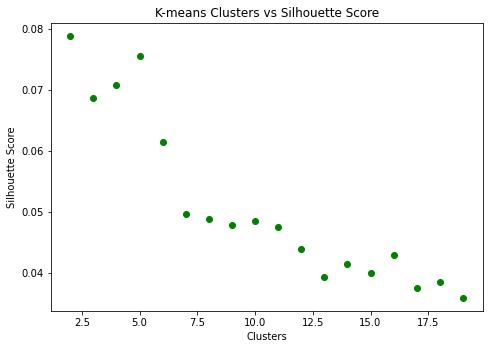

In [17]:
# Create a scatter plot of Clusters vs Silhouette Score
fig=plt.figure()
ax=fig.add_axes([0, 0, 1, 1])
ax.scatter(silhouette_df_df['Clusters'], silhouette_df_df['Silhouette Score'], color='green')
ax.set_xlabel('Clusters')
ax.set_ylabel('Silhouette Score')
ax.set_title('K-means Clusters vs Silhouette Score')
plt.show()

## Use the plot created in (3) to choose an optimal number of clusters for K-means. Justify your choice.

Based on the silhouette score and graph generated, we can see that the optimal number of clusters for the data is 2.  

## Fit a K-means model to the data with the optimal number of clusters chosen in part (4).

In [18]:
## Fit K-means model to the data with 2 clusters.
kmeans = KMeans(init="random",n_clusters=2,n_init=10,max_iter=300,random_state=42)

In [19]:
kmeans.fit(df_scaled)

KMeans(init='random', n_clusters=2, random_state=42)

## Fit a PCA transformation with two features to the scaled data.

In [20]:
#Pass the number of components (n_components=2) and call fit_transform
pca_als = PCA(n_components=2)
pca_als.fit(df_scaled)

PCA(n_components=2)

In [21]:
# transform the PCA
pca_als.transform(df_scaled)

array([[-1.4267426 , -2.31901808],
       [-1.44024117, -4.87149062],
       [ 1.61784358, -0.42861302],
       ...,
       [-0.43290899,  4.24568346],
       [-0.33079461,  3.31754158],
       [ 1.46798598,  0.58206882]])

In [22]:
# Calculate resulting components scores for the elements in the dataset (X)
scores_pca_als=pca_als.transform(df_scaled)


In [23]:
# Create a new dataframe with the original features and add the PCA scores 
pca_df = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores_pca_als)], axis=1)
pca_df.columns.values[-2: ] = ['PC_1', 'PC_2']


pca_df['Segment K-means PCA'] = kmeans.labels_

In [24]:
# Add the names of the segments to the labels
pca_df['Segment'] = pca_df['Segment K-means PCA'].map({0:'first',1:'second', 2:'third', 3:'fourth'})

In [25]:
# display the head of the dataframe
pca_df.head()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,PC_1,PC_2,Segment K-means PCA,Segment
0,65,57.0,40.5,38.0,0.066202,-0.965608,30,28.0,22,0.021164,...,7.0,7,0.002646,6.0,6.0,6.0,-1.426743,-2.319018,0,first
1,48,45.0,41.0,39.0,0.010453,-0.921717,37,33.0,21,0.028725,...,7.0,5,0.005386,7.0,5.0,5.0,-1.440241,-4.871491,0,first
2,38,50.0,47.0,45.0,0.008929,-0.914787,24,14.0,10,0.025000,...,0.0,0,0.008929,6.0,5.0,5.0,1.617844,-0.428613,1,second
3,63,47.0,44.0,41.0,0.012111,-0.598361,30,29.0,24,0.014963,...,5.0,3,0.004988,7.0,6.0,5.0,-1.920000,2.095740,0,first
4,63,47.0,45.5,42.0,0.008292,-0.444039,32,27.5,20,0.020374,...,4.0,1,0.008489,6.0,5.0,5.0,0.297694,0.167790,1,second


In [26]:
# display the tail of the dataframe
pca_df.tail()

,Age_mean,Albumin_max,Albumin_median,Albumin_min,Albumin_range,ALSFRS_slope,ALSFRS_Total_max,ALSFRS_Total_median,ALSFRS_Total_min,ALSFRS_Total_range,...,trunk_median,trunk_min,trunk_range,Urine.Ph_max,Urine.Ph_median,Urine.Ph_min,PC_1,PC_2,Segment K-means PCA,Segment
2218,33,50.0,49.0,45.0,0.008772,-0.239501,35,32.5,30,0.009107,...,5.0,5,0.003643,7.00,6.0,5.0,-4.477583,1.200112,0,first
2219,61,47.0,45.0,42.0,0.009074,-0.388711,31,26.0,17,0.025408,...,4.0,3,0.003630,7.41,5.5,5.0,-0.398949,-1.876660,0,first
2220,47,46.0,44.0,41.0,0.012111,-0.108631,26,23.0,20,0.010949,...,4.0,4,0.001825,9.00,6.0,5.0,-0.432909,4.245683,0,first
2221,37,49.0,44.0,39.0,0.017857,-0.855880,34,29.5,21,0.023214,...,4.5,2,0.010714,6.00,5.0,5.0,-0.330795,3.317542,0,first
2222,48,48.0,45.0,40.0,0.018476,-2.050562,37,34.0,11,0.059908,...,8.0,1,0.016129,5.00,5.0,5.0,1.467986,0.582069,1,second


## Make a scatterplot of the PCA transformed data coloring each point by its cluster value.

/Users/keiuntaesmith/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


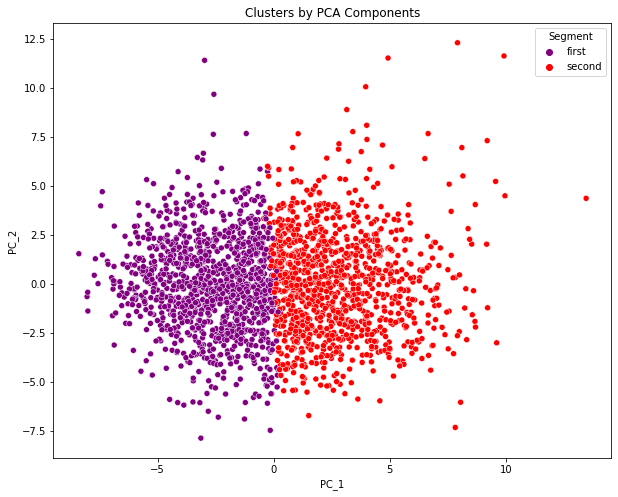

In [27]:
# Plot scatterplot of PCA transformed data identifying each point by its cluster value
x_axis = pca_df['PC_2']
y_axis = pca_df['PC_1']
plt.figure(figsize =(10,8))
sns.scatterplot(y_axis,x_axis, hue=pca_df['Segment'], palette = ['purple', 'red'])
plt.title('Clusters by PCA Components')
plt.show()

## Summarize your results and make a conclusion.

The Silhouette Coefficient of 0.078877 signifies that the optimal number of clusters for the ALS data set is 2.  There are two clear separated featured groups that are ascertained as a consequence of fitting the K-means model and PCA transformation.  The properties of the clusters are condensed and clearly distinctive as visulaized in the scatter plot above.  The left cluster appears to be more denser than the right cluster, which has more outliers.  